In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [5]:
file1 = 'https://raw.githubusercontent.com/Cyndie-Matinou/DATA602/main/cars_one.csv'
file2 = 'https://raw.githubusercontent.com/Cyndie-Matinou/DATA602/main/cars_two.csv'

cars_one = pd.read_csv(file1)   # read in the first data file
cars_two = pd.read_csv(file2)   # read in the second data file

# we have other columns named unamed which contains only NaN values
# so we drop them.
cars_one.drop(cars_one.columns[9:],axis=1,inplace=True) 

# concatenate the two data
AlltheCars = pd.concat([cars_one,cars_two])
AlltheCars.head(10) 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
5,15.0,8,429,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390,190,3850,8.5,70,1,amc ambassador dpl


In [6]:
#studing the features
AlltheCars.info()  # print the info of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    int64  
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car           398 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.1+ KB


In [7]:
#figure out why horsepower is different
AlltheCars.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
# we can see that the odd value is '?' representing null

AlltheCars.horsepower = AlltheCars.horsepower.str.replace('?','NaN').astype(float)
AlltheCars.horsepower.fillna(AlltheCars.horsepower.mean(),inplace=True)
AlltheCars.horsepower = AlltheCars.horsepower.astype(int)

# print the info of the data again to see the datatypes of columns
AlltheCars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    int64  
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car           398 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 31.1+ KB


/var/folders/c7/8rhqfzpj69dc3qs71xn8s94w0000gp/T/ipykernel_908/216289802.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  AlltheCars.horsepower = AlltheCars.horsepower.str.replace('?','NaN').astype(float)


In [9]:
# won't be needing the car column so we drop it
AlltheCars = AlltheCars.drop('car',axis=1)



In [10]:
# check for duplicates and null values
print('sum of duplicated values: {}\n'.format(AlltheCars.duplicated().sum()))
print('sum of null values: {}'.format(AlltheCars.isnull().sum()))


sum of duplicated values: 0

sum of null values: mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
dtype: int64


In [11]:
# let's print the summary statistics of the data
display(AlltheCars.describe())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.427136,104.462312,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.268683,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


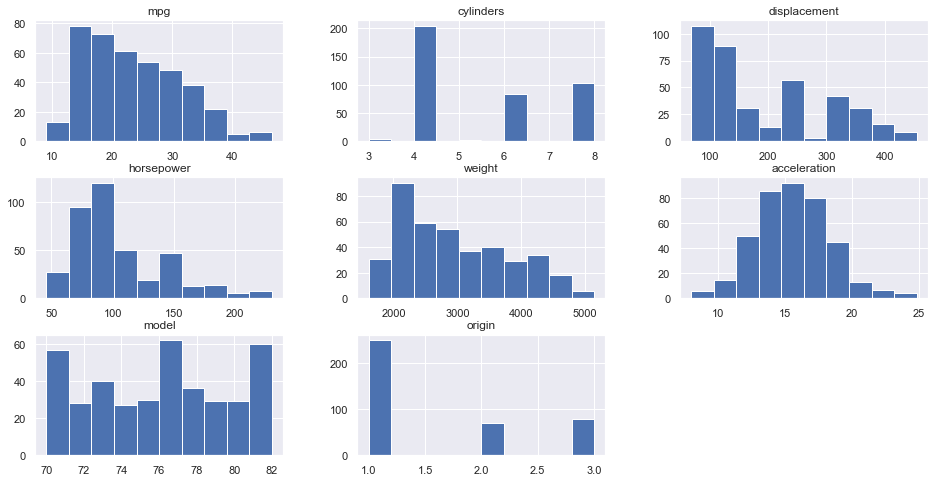

In [12]:
# let's visualize the distribution of the features of the cars
AlltheCars.hist(figsize=(16,8),bins=10)
plt.show()

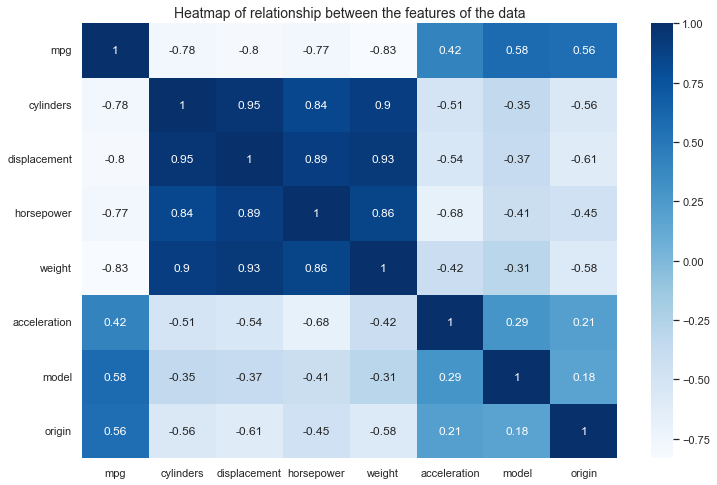

In [13]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and....
#.... the other features.
plt.figure(figsize=(12,8))
sns.heatmap(AlltheCars.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('Heatmap of relationship between the features of the data',
         fontsize=14)
plt.show()


In [14]:

# We can also check for multicollinearity using the variance inflation factor.

X1 = sm.tools.add_constant(AlltheCars) 

series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],
                  index=X1.columns)



/Users/c-keys/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
# Let's drop the columns that highly correlate with each other
newcars = AlltheCars.drop(['cylinders','displacement','weight'],axis=1)




In [19]:
# so we did the variance inflation factor method again to see if there is still
#multicolinearity
X2 = sm.tools.add_constant(newcars)

series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)

print(' before feature selection: \n\n{}\n'.format(series1))
print('after feature selection: \n\n{}'.format(series2))

 before feature selection: 

const           780.806732
mpg               5.583604
cylinders        10.742595
displacement     22.161456
horsepower        9.057010
weight           13.468497
acceleration      2.515892
model             1.954983
origin            1.853451
dtype: float64

after feature selection: 

const           715.683761
mpg               3.982206
horsepower        4.131289
acceleration      2.029527
model             1.607080
origin            1.542532
dtype: float64


In [20]:
X = newcars.drop('mpg',axis=1)  # create a DataFrame of feature/independent variables
y = newcars.mpg   # create a series of the dependent variable

# the feature/independent variables are not of the same scale so we scale them 
# this is only neccessary for the LinearRegression,Ridge
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data

LinearRegression()

In [21]:
linear_pred = model.predict(X_test)  # make prediction with the fitted model

# score the model on the train set
print('Train score: {}\n'.format(model.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))


Train score: 0.7553135661809439

Test score: 0.7271939488775567

Overall model accuracy: 0.7271939488775567

Mean Squared Error: 17.43282026200509


In [22]:
# let's fit a ridge regression model and see if we can get a higher accuracy
ridge = Ridge(alpha=.01)
ridge.fit(X_train,y_train)  # fit the model with the training data

ridge_pred = ridge.predict(X_test)  # make predictions

# score the model to check the accuracy
print('Train score: {}\n'.format(ridge.score(X_train,y_train)))
print('Test score: {}\n'.format(ridge.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,ridge_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,ridge_pred)))

Train score: 0.7553135647960986

Test score: 0.7271921092249626

Overall model accuracy: 0.7271921092249626

Mean Squared Error: 17.43293781926926


In [23]:
# we now try to tune the parameters of the ridge model for a better accuracy
#taken from stackoverflow 
ridge_model = Ridge()

param = {'alpha':[0,0.1,0.01,0.001,1]}  # define the parameters

# initialize the grid search
ridge_search = GridSearchCV(ridge_model,param,cv=5,n_jobs=-1)

ridge_search.fit(X_train,y_train)   # fit the model 

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1]})

In [17]:
# print out the best parameter for ridge and score it on the test and train data

print('Best parameter found:\n{}'.format(ridge_search.best_params_))
print('Train score: {}\n'.format(ridge_search.score(X_train,y_train)))
print('Test score: {}'.format(ridge_search.score(X_test,y_test)))


Best parameter found:
{'alpha': 1}
Train score: 0.7553000451656908

Test score: 0.726999466880118


In [28]:
# we move on to using the ensemble methods for the regression

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)


In [35]:

dtree = DecisionTreeRegressor() # initialize a DecisionTreeRegressor model

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}                # define the hyperparameters

tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [36]:
tree_pred = tree_search.predict(xtest)  # make predictions with the model

# print out the best parameters found and score the model
print('Best parameter found:\n{}\n'.format(tree_search.best_params_))
print('Train score: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(tree_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,tree_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,tree_pred)))

Best parameter found:
{'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 7}

Train score: 0.8599495767714638

Test score: 0.8172529061610941

Overall model accuracy: 0.8172529061610941

Mean Squared Error: 14.018961022849329


In [38]:

#we add n estimators parameters from previous parameters dictionary
forest = RandomForestRegressor()

# we add the n_estimators parameter in our previous parameter dictionary
params['n_estimators'] = [100,200,300,400,500]

#initialise the grid search
forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,    
                                  n_iter=50)

forest_search.fit(xtrain,ytrain)  #here we fit the model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [43]:
#now lets try to make a prediction with the model

#we will print the best parameters and the scores for test train and accuracy

forest_prediction = forest_search.predict(xtest)

print('Best parameter: \n{}\n'.format(forest_search.best_params_))


Best parameter: 
{'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 6}



In [40]:
print('our train score is: \n{}\n'.format(forest_search.score(xtrain,ytrain)))

our train score is: 
0.9275024749575005



In [41]:
print('our test score: \n{}\n'.format(forest_search.score(xtest,ytest)))

our test score: 
0.8676541112631845



In [44]:
print('Overall Accuracy: \n{}\n'.format(r2_score(ytest,forest_prediction )))

Overall Accuracy: 
0.8676541112631845



This is a regression project. Aim is to predict miles per gallon (mpg) fuel consumption for vehicles. Thus, mpg is your target variable. You need to predict mpg as close as possible with the provided variables (you do not have to use all the variables).

First, start by analyzing the dataset for numerical and non-numerical values, if it contains values between different ranges and if it has any missing values. You may need to preprocess the dataset to ensure that we are only feeding numerical values to the machine learning model for predictions.

There are no specific instructions about which models you are going to use. You are expected to try several methods we have seen in the lectures (not only Linear Regression but also Support Vector Reg., Regresstion Trees etc.) and compare them. Also, you are supposed to apply best practices we have seen such as hyperparameter selection, cross validation and regularization.

Please prepare a python notebook that describes the steps, present the results as well as your comments.